In [1]:
#Cooperation in an RNA Enzyme Network
#MATH 243 
#Zoe Weiss 
#May 10, 2022

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
#payoff of xC
def fC(xC, xL, s, r, l, f):
    fC = s*xC + r*xL
    return fC

#payoff of xL
def fL(xC, xL, s, r, l, f):
    fL = l*xC + f*xL
    return fL

In [4]:
s = 1
f = -1
def r(xC):
    r = -1*xC
    #r=-1
    return r

def l(xL):
    l = -5*xL
    #l = -1
    return l

def phi():
    phi = 1
    return phi

r12 = 0.9
r21 = 0.9
m1 = 0.1
m2 = 0.1

def fC(j, xC, xL):
    return s*xC+r(xC)*xL

def fL(j, xC, xL):
    return l(xL)*xC+f*xL

def Q(j, pos):
    Q_matrix = [[0, r12*(1-m1)],[r21*(1-m2), 0]]
    return Q_matrix[j][pos]

def xC_model(xC,t):
    dxCdt = 0
    xL = 1-xC
    if xC>-0.001 and xL>-0.001:
        for j in range(2):
            dxCdt+=(xC*fC(j, xC, xL)*Q(j, 1))
    return dxCdt

In [5]:
xC0s = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

all_results = []
for xC0 in xC0s:
    t = np.linspace(0,1,200)
    result = odeint(xC_model,xC0,t)
    for element in result:
        if element>1:
            element = 1
    all_results.append(result)

Text(0, 0.5, 'xC')

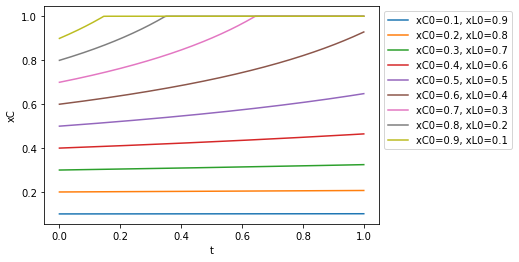

In [6]:
fig,ax = plt.subplots()
for element in range(len(xC0s)):
    ax.plot(t,all_results[element],label='xC0='+str(xC0s[element])+', xL0='+str(round(1-xC0s[element],3)))

ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('t')
ax.set_ylabel('xC')